## Project ADA Milestone 2: Exploratory Analysis

**Importing libraries**

For this Milestone, we mainly used Pandas in order to do exploratory analysis. For mathematical operations, and arrays, we used NumPy, and finally for plotting we used Matplotlib and Seaborn.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [123]:
df = pd.read_csv('en.openfoodfacts.org.products.csv', sep="\t", encoding="utf-8", low_memory=False)

In [124]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We see from here that there is a lot of information, and it seems that there is a lot of NaN values for certain columns.

More precisely, we can compute the number of columns in the dataframe:

In [125]:
print('Number of columns in the DataFrame:', df.columns.size)

Number of columns in the DataFrame: 173


There are many features, but we definitely won't work with all of them for the purpose of this project.

As we explore the dataset, we will only keep a few columns from all those we have at our disposal.

**NaN proportion for each column**

As mentioned earlier, it looks like there are many NaN values. Let's see that. Here we compute the proportion of NaN values for each columns, and only plot the columns that have less than 50% of NaNs.

Number of columns that have a proportion of NaN less than 50%:  30


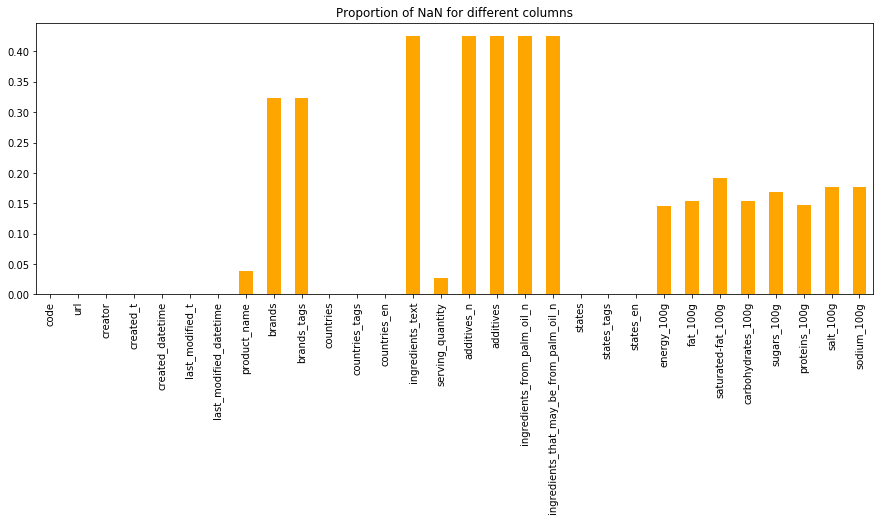

In [126]:
nan_proportion = df.isnull().mean(axis=0)
nan_proportion_50 = nan_proportion[nan_proportion<0.5]
print('Number of columns that have a proportion of NaN less than 50%: ', nan_proportion_50.size)

plt.figure(figsize=(15, 5))
nan_proportion_50.plot(kind='bar', color='orange')
plt.title('Proportion of NaN for different columns')

plt.show()

Quite surprising! Actually, only 30 columns are more than half filled on the 173 that we have at our disposal. This suggest that maybe we will need to review some of things we planned to do because of the missing values. Indeed, if a huge amount of values are missing, we won't get very precise insights about the data for these columns.

**Choosing the columns to keep**

Now let's see with what columns we are going to work with. Of course, we keep the information about the products such as the name, brand, url. 

Then we also want to keep the information about the countries, since it was one of the main focus of the project.

We will also keep all those related to the composition of the products(serving quantity, additives, fat, sugar, ...) as it will help us get insights about which country eats what.



In [127]:
cols = ['product_name', 'url', 'brands_tags', 'countries_en', 'origins', 'serving_quantity', 'additives_n', 
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 
       'proteins_100g', 'salt_100g']

In [128]:
df = df[cols]
df['countries_en'] = df['countries_en'].str.lower()
df['origins'] = df['origins'].str.lower()

In [129]:
def without_nan(df, column):
    return df[~df[column].isnull()]

In [130]:
def splitDataFrameList(df, target_column, separator):
    ''' df = dataframe to split,
    target_column = the column containing the values to split
    separator = the symbol used to perform the split

    returns: a dataframe with each entry for the target column separated, with each element moved into a new row. 
    The values in the other columns are duplicated across the newly divided rows.
    '''
    def splitListToRows(row, row_accumulator, target_column, separator):
        split_row = row[target_column].split(separator)
        for s in split_row:
            new_row = row.to_dict()
            new_row[target_column] = s
            row_accumulator.append(new_row)
    new_rows = []
    df.apply(splitListToRows,axis=1,args = (new_rows,target_column,separator))
    new_df = pd.DataFrame(new_rows)
    return new_df

**Import - Export**

As a first analysis, we will try to visualize which countries import and export, for the main countries in the dataset.

First, we split the 'countries' and 'origins' columns, since they may contain more than one country.

In [131]:
df = splitDataFrameList(without_nan(df, 'countries_en'), 'countries_en', ',')
df = splitDataFrameList(without_nan(df, 'origins'), 'origins', ',')

In [132]:
print('New shape of our DataFrame:', df.shape)

New shape of our DataFrame: (60114, 14)


As we can see, we end up with quite a lot more data when splitting to get all the countries.

Now let's get the destination and origin countries for the products, and try to first visualize which are the top destination countries:

In [133]:
countries_origins = df[['countries_en', 'origins']]
dest_count = countries_origins['countries_en'].value_counts()
origins_count = countries_origins['origins'].value_counts()

We plot below the top-25 destination countries. Note that since France has a significantly higher number of products (this is a french dataset), we also plot in the log scale.

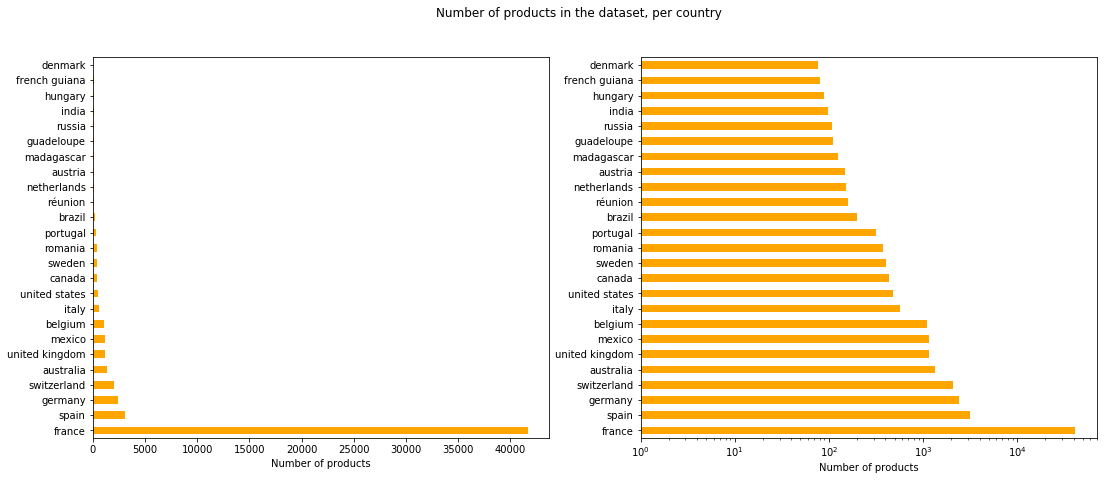

In [134]:
#Create subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

#Plot the count of the products for each destination country
dest_count[:25].plot(kind='barh', color='orange', ax=ax1)
ax1.set_xlabel('Number of products')

#Plot again in log scale
dest_count[:25].plot(kind='barh', color='orange', ax=ax2, log=True)
ax2.set_xlabel('Number of products')

f.suptitle('Number of products in the dataset, per country')
plt.show()

Not surprinsingly, the top countries are mainly those from Europe (again, the dataset focuses a lot on France and Europe), but we can also see the US abd Mexico for example.

Here, we will visualize the origins and destinations, for the top 15 countries in the destinations. We chose to represent this information as a heatmap. 
For each pair of countries, we compute the number of food products for that pair and add one to the corresponding cell in a matrix representing those pairs.

After the matrix is filled with the counts of the different pairs, we use the heatmap() function of Seaborn to visualize the results.

In [135]:
top_15 = dest_count[:15].index

In [136]:
#Create the matrix that will contain the counts
matrix = pd.DataFrame(np.zeros((15, 15)), index=top_15, columns=top_15)

#Fill in the matrix (for the top countries)
for idx, row in countries_origins.iterrows():
    origin = row['origins']
    destination = row['countries_en']
    if destination in top_15 and origin in top_15:
        matrix.at[origin, destination] += 1

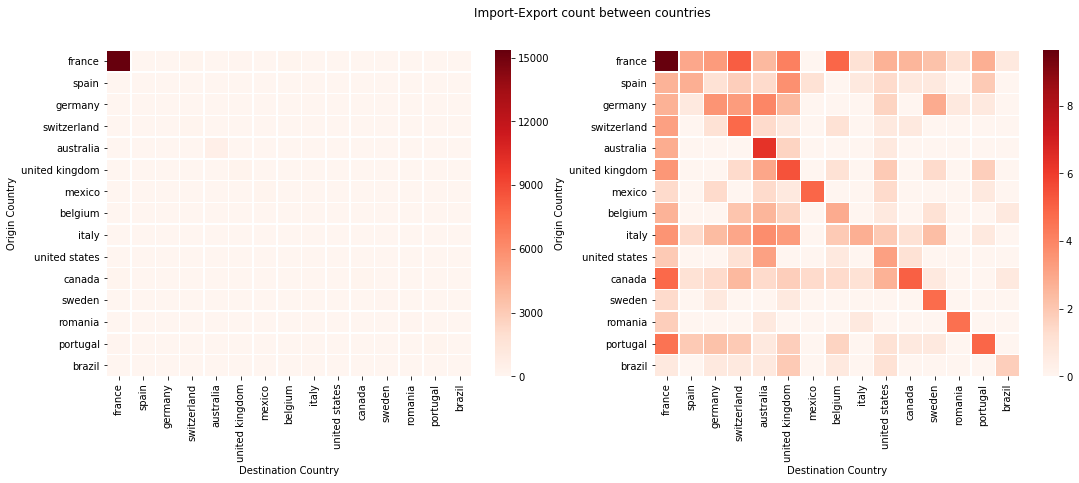

In [141]:
#Create subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

#Use Seaborn to plot a heatmap using the matrix
sns.heatmap(matrix, linewidth=0.5, cmap='Reds', ax=ax1)
ax1.set_ylabel('Origin Country')
ax1.set_xlabel('Destination Country')

#Plot again in log scale
sns.heatmap(np.log(matrix+1), linewidth=0.5, cmap='Reds', ax=ax2)
ax2.set_ylabel('Origin Country')
ax2.set_xlabel('Destination Country')

f.suptitle('Import-Export count between countries')
plt.show()

As France has a count that is a lot larger, we also plotted on the right with a log scale to get better insights. What we see from this plot is very interesting. 

With this dataset, it looks like many countries actually produce their own food. Again, as France has always more data in this dataset, we see that France import and export to many countries. This may definitely be biased, and that's why we prefer to focus also on the other countries.

Australia and UK also produce a lot of their own food. As big exporters, we spot Spain, Germany, Italy and Portugal, which makes sens for Europe. As importers, the plot suggests that Germany, Switzerland, Australia and UK are the main ones.

**Additives per country**

In this part, we focus on an interesting analysis that aim to see which are the countries that eat with the biggest number of additives.

In order to compute that, we will make use of the 'additives_n' columns, and again the data about the countries.

In [138]:
additives_mean = df.groupby('countries_en').mean()['additives_n']

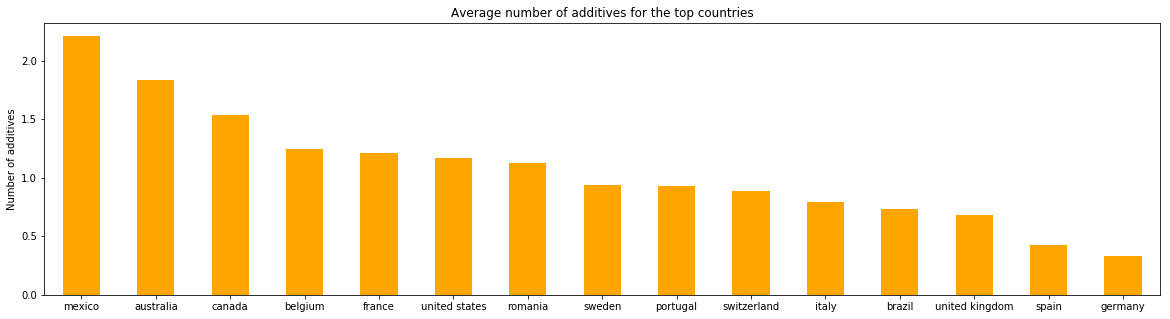

In [139]:
additives_mean.loc[top_15].sort_values(ascending=False).plot(kind='bar', color='orange', figsize=(20, 5), rot=0)
plt.ylabel('Number of additives')
plt.title('Average number of additives for the top countries')
plt.show()